# ABOUT THIS PROJECT

Name : Naufaldy Erianda

This dataset is about e-commerce customer action in their web. I try to do EDA for this data set for get any insight of this data. The objective is i want to **predict will they purchase or not** after they put it in the cart.

# IMPORT LIBRARY

In [1045]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from feature_engine.outliers import OutlierTrimmer,Winsorizer
from imblearn.over_sampling import SMOTENC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score
import pickle

# DATA LOADING

In [1046]:
df = pd.read_csv('user-events.csv')

In [1047]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [1048]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [1049]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64

In [1050]:
#check pescentage of missing values

print('missing value of category_code : ', df['category_code'].isnull().sum()/len(df['category_code'])*100)
print('missing value of brand : ', df['brand'].isnull().sum()/len(df['brand'])*100)
print('missing value of user_session : ', df['user_session'].isnull().sum()/len(df['user_session'])*100)

missing value of category_code :  26.687522383742934
missing value of brand :  23.992435000999855
missing value of user_session :  0.018641350582796406


There is so many missing value data, for minimalize missing value i will change missing value of category to 'other', because there is a chance that category product that is not match with available category in website.

In [1051]:
#check duplicated

print('duplicated data :',df.duplicated().sum())

duplicated data : 655


In [1052]:
#drop duplicated and keep the last one

df.drop_duplicates(keep='last')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx


i drop duplicated data, because duplicate data can be harm to analysis or predictive data

In [1053]:
#convert event_time to datetime

df['event_time'] = pd.to_datetime(df['event_time'])

In [1054]:
#check date of this sample

print('start on',df['event_time'].min())
print('until',df['event_time'].max())

start on 2020-09-24 11:57:06+00:00
until 2021-02-28 23:59:09+00:00


This data set is contains of 6 Months activity in e-commerce website

In [1055]:
#drop missing value is user_session
df['user_session'].dropna(inplace = True)

#because the missing value is above 20% of the data, i will replace it with 'unknown' 
#this will used for split category_code

df['category_code'].fillna('other', inplace= True)

In [1056]:
#split category and create new category

df['category'] = df['category_code'].apply(lambda x : x.split(".")[0])

In [1057]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,electronics
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,computers
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,other,NaN,9.81,1515915625513238515,4TMArHtXQy,other
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,computers
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,other,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,other


In [1058]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code         0
brand            212364
price                 0
user_id               0
user_session        165
category              0
dtype: int64

In [1059]:
df['category_id'].nunique()

718

# EXPLORATION DATA ANALYSIS

## Event type

In [1060]:
df.event_type.value_counts()

view        793748
cart         54035
purchase     37346
Name: event_type, dtype: int64

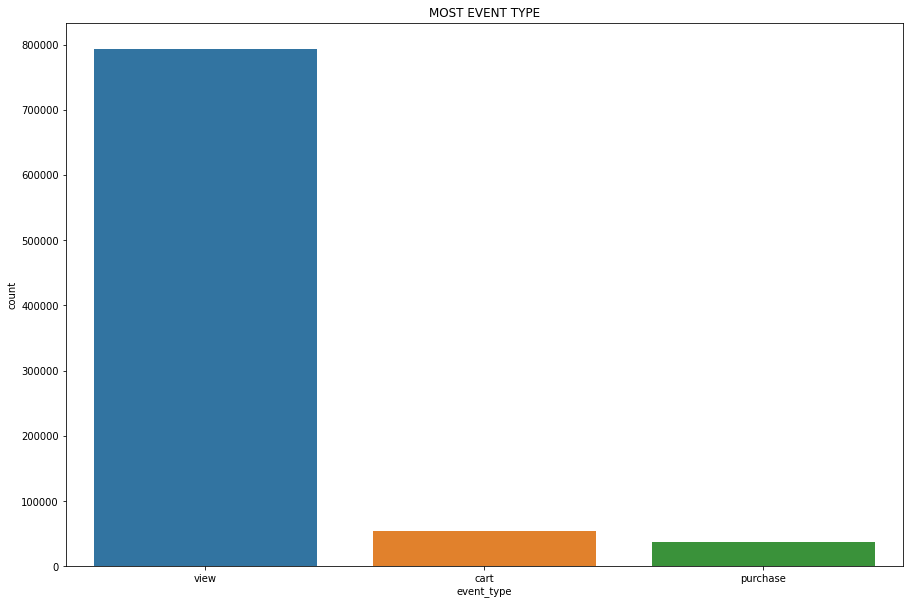

In [1061]:
fig,ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(x='event_type',data = df, ax = ax)
ax = ax.set_title('MOST EVENT TYPE')

Most of user activity is just view the product, but the proportion of view and others (cart and puchase) have a big difference. It can be, customer take time to view the product before make descision to buy that product.

## Category

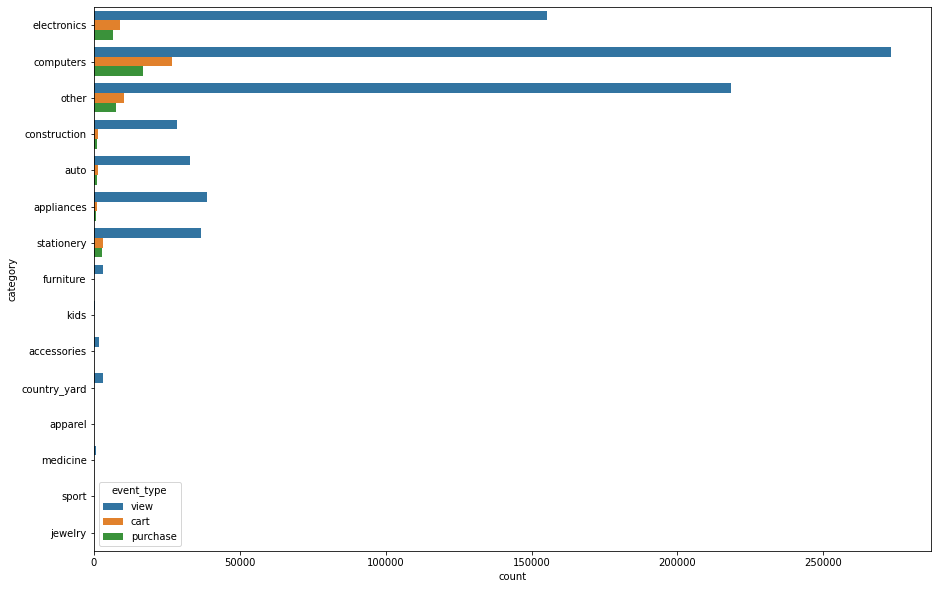

In [1062]:
#we check all category

fig,ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(y='category',hue = 'event_type', data = df, ax = ax)

In [1063]:
#we will make some query for event_type

purchase = df.query("event_type=='purchase'")
cart = df.query("event_type=='cart'")
view = df.query("event_type=='view'")

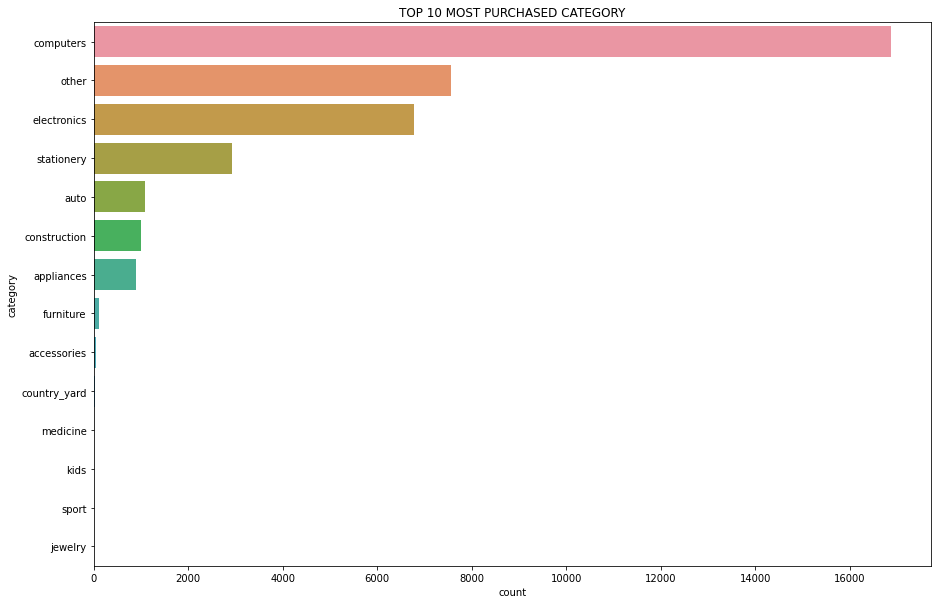

In [1064]:
fig,ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(y='category', data = purchase, ax = ax,order = purchase['category'].value_counts().index)
ax = ax.set_title('TOP 10 MOST PURCHASED CATEGORY')

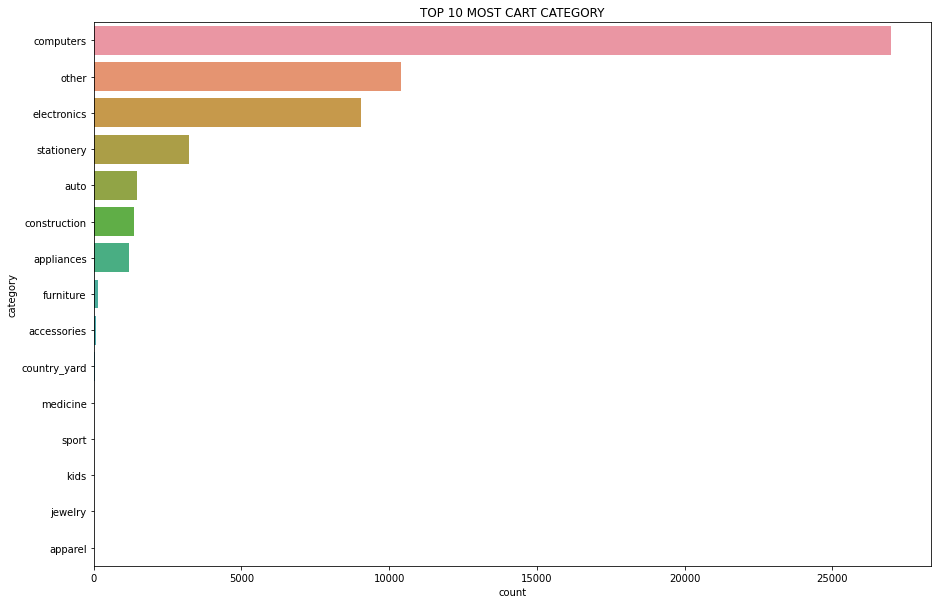

In [1065]:
fig,ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(y='category', data = cart, ax = ax,order = cart['category'].value_counts().index)
ax = ax.set_title('TOP 10 MOST CART CATEGORY')

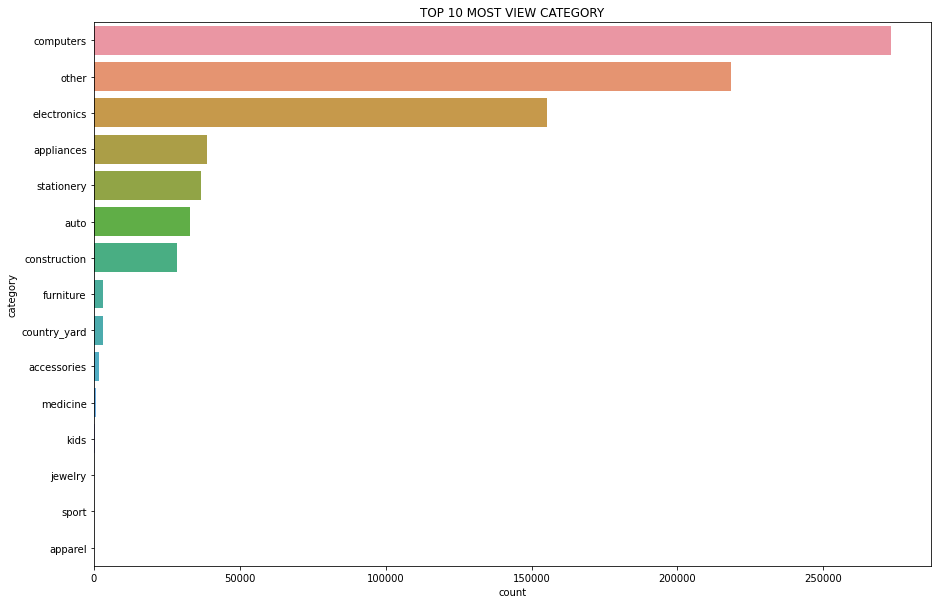

In [1066]:
fig,ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(y='category', data = view, ax = ax,order = view['category'].value_counts().index)
ax = ax.set_title('TOP 10 MOST VIEW CATEGORY')

The most category that customer want is computers. That we can see so many product view, cart, purchase is a computers category. It can be say, the market of this e-commerce is a people who want to upgrade/create their computers. 

## Time

In [1067]:
#split event_time to spesific year,months,day, and hour

df_time = df.copy()

df_time['year'] = df_time['event_time'].dt.year
df_time['month'] = df_time['event_time'].dt.month
df_time['day'] = df_time['event_time'].dt.day
df_time['hour'] = df_time['event_time'].dt.hour

In [1068]:
#same with another EDA we will make some query

purchase = df_time.query("event_type=='purchase'")
cart = df_time.query("event_type=='cart'")
view = df_time.query("event_type=='view'")

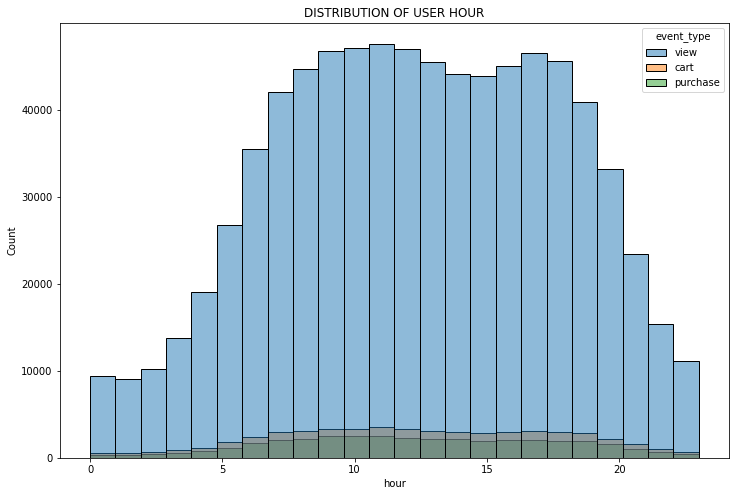

In [1069]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.histplot(x='hour', data = df_time, bins = 24,hue = 'event_type')
ax = ax.set_title('DISTRIBUTION OF USER HOUR')

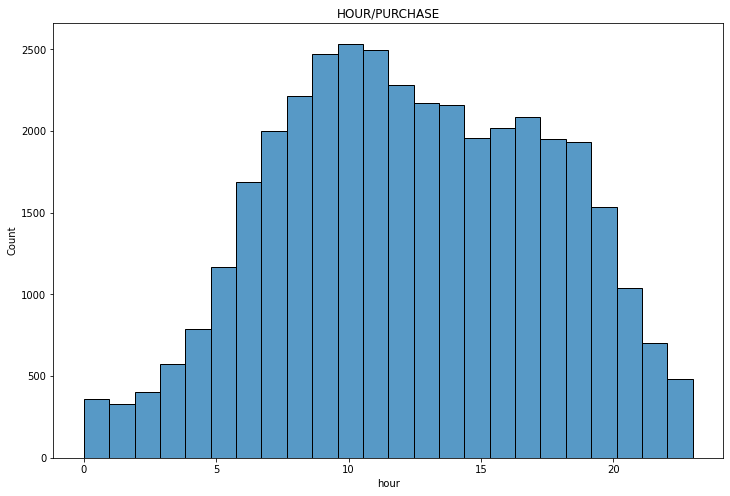

In [1070]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.histplot(x='hour',data = purchase,bins = 24)
ax = ax.set_title('HOUR/PURCHASE')

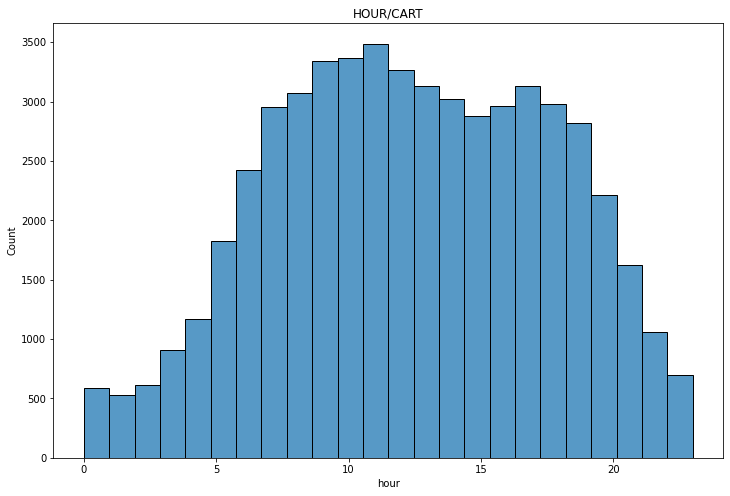

In [1071]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.histplot(x='hour',data = cart,bins = 24)
ax = ax.set_title('HOUR/CART')

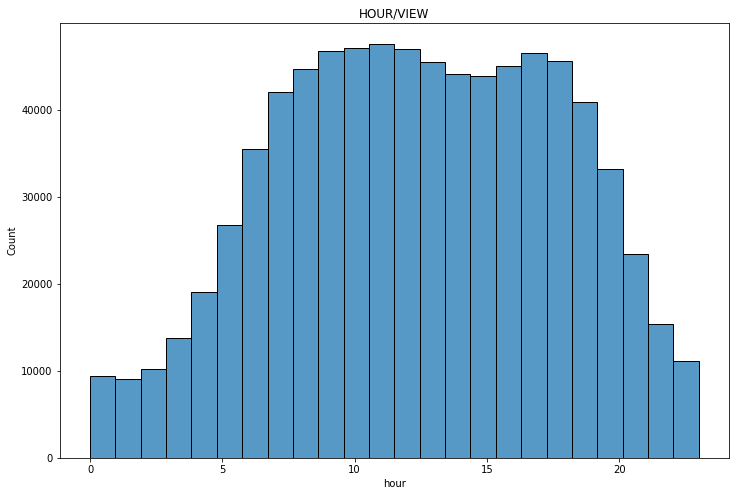

In [1072]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.histplot(x='hour',data = view,bins = 24)
ax = ax.set_title('HOUR/VIEW')

a peak time of e-commerce traffic is around 10 o'clocks and around 18 o'clocks. with that time, e-commerce have a busy traffic of customer who view, take to cart, and make a purchase of products.

## Time Months

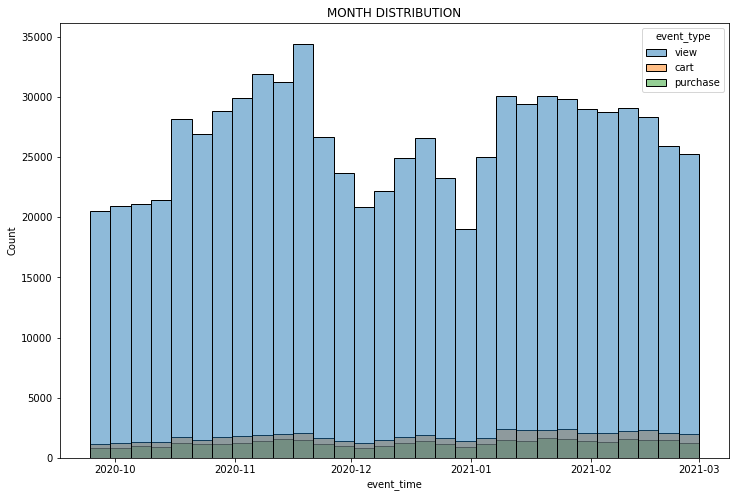

In [1073]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.histplot(x='event_time',data = df_time,bins = 30, hue = 'event_type')
ax = ax.set_title('MONTH DISTRIBUTION')

With this months distribution we can see, the peak months of traffic in e-commerce is in 2020-11 and in 2021 the e-commerce have a stable and better traffic than 2020. After this, we will see the best month of ecommerce traffic

In [1074]:
#make some query of years

df_20 = df_time.query("year == 2020")
df_21 = df_time.query("year == 2021")

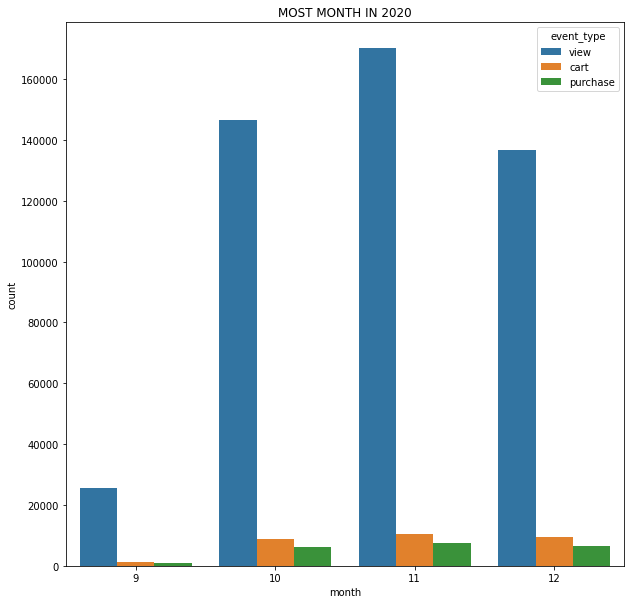

In [1075]:
#we look for most month in 2020
fig,ax = plt.subplots(figsize=(10,10))

ax = sns.countplot(x='month', data = df_20, ax = ax,hue = 'event_type')
ax = ax.set_title('MOST MONTH IN 2020')

November 2020 is the best month. e-commerce have so many traffic in this month. So people tend to look and buy a product before end of the year. why not December? maybe they spend their money for new year eve or holiday.

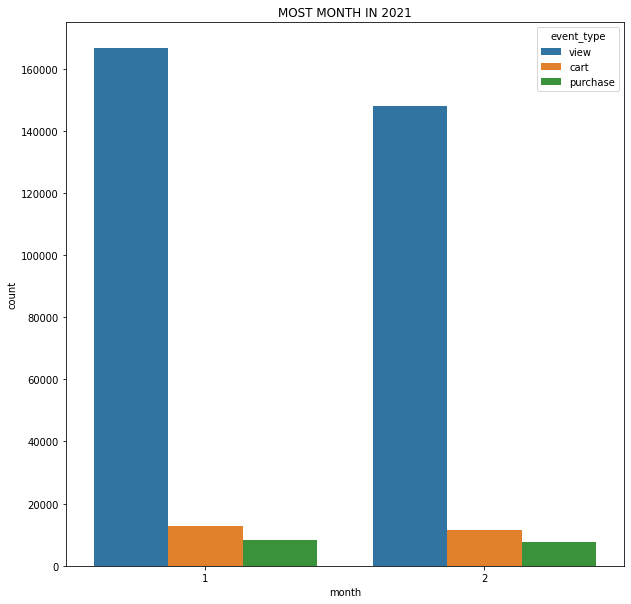

In [1076]:
#we look for most month in 2021
fig,ax = plt.subplots(figsize=(10,10))

ax = sns.countplot(x='month', data = df_21, ax = ax,hue = 'event_type')
ax = ax.set_title('MOST MONTH IN 2021')

in 2021, Januari is the best month to customer looking for a products, but not as many as November.

## Brand

In [1077]:
df.brand.value_counts()

asus         27706
gigabyte     27673
msi          24877
palit        24802
samsung      23208
             ...  
elekta           1
vitesse          1
vitek            1
docash           1
cipherlab        1
Name: brand, Length: 999, dtype: int64

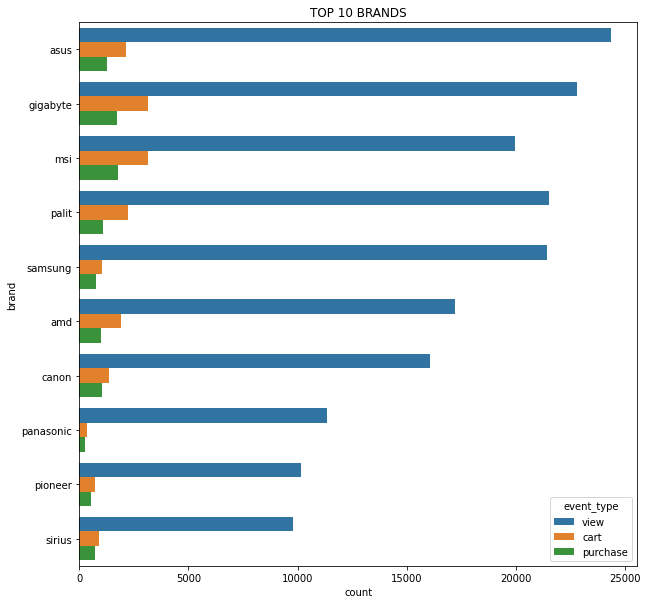

In [1078]:
fig,ax = plt.subplots(figsize=(10,10))

ax = sns.countplot(y='brand', data = df, ax = ax,
                    order = df['brand'].value_counts().iloc[:10].index, hue='event_type')
ax = ax.set_title('TOP 10 BRANDS')

ASUS is the most product that customer is looking for, but not the most product that customer purchase, we will see the most product per event_type in down here.

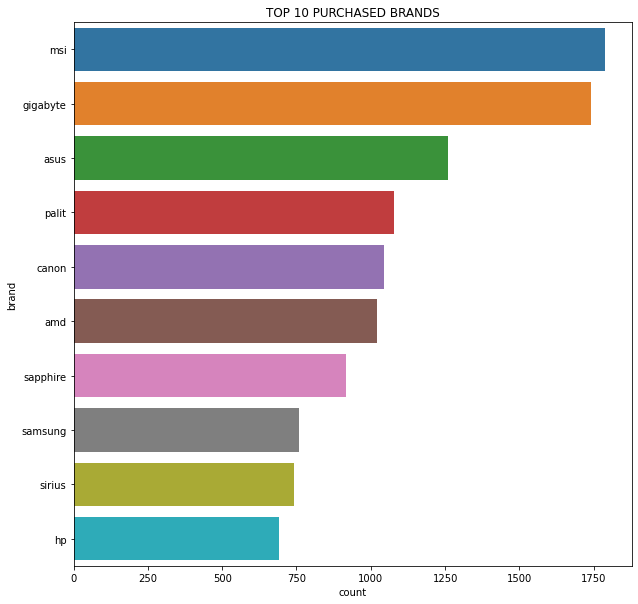

In [1079]:
fig,ax = plt.subplots(figsize=(10,10))

ax = sns.countplot(y='brand', data = purchase, ax = ax,
                    order = purchase['brand'].value_counts().iloc[:10].index)
ax = ax.set_title('TOP 10 PURCHASED BRANDS')

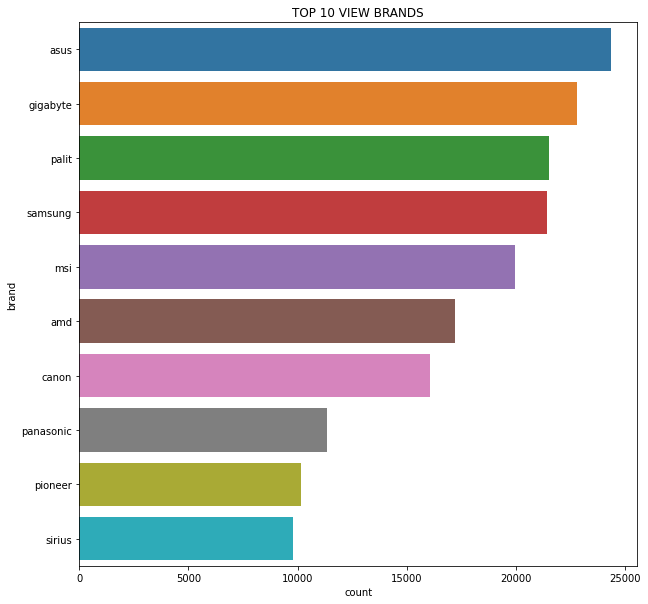

In [1080]:
fig,ax = plt.subplots(figsize=(10,10))

ax = sns.countplot(y='brand', data = view, ax = ax,
                    order = view['brand'].value_counts().iloc[:10].index)
ax = ax.set_title('TOP 10 VIEW BRANDS')

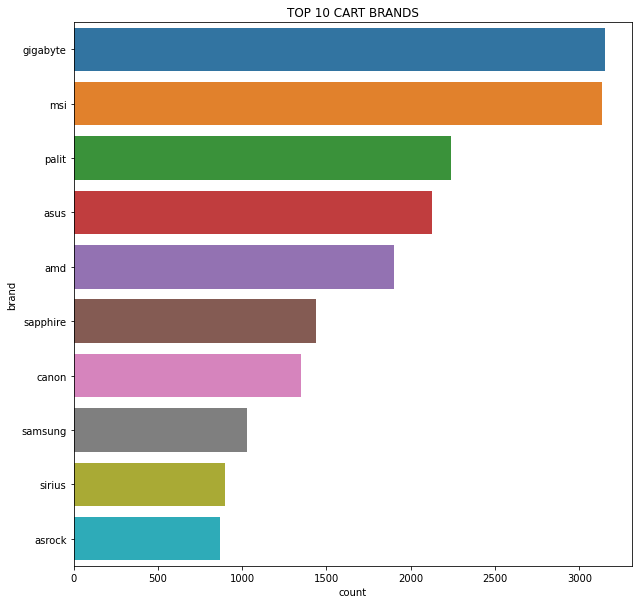

In [1081]:
fig,ax = plt.subplots(figsize=(10,10))

ax = sns.countplot(y='brand', data = cart, ax = ax,
                    order = cart['brand'].value_counts().iloc[:10].index)
ax = ax.set_title('TOP 10 CART BRANDS')

The most product that customer purchase is, MSI. we can see the ASUS is in third place for product that customer purchase. But so many customer that view the Asus product. in Cart type, Gigabyte in First place the value not has a many diff with MSI (second place). Maybe MSI have a good price compared to their competitor like asus or gigabyte. With that good price, customer dont take time to think so long for purchase the products. 

## Earning

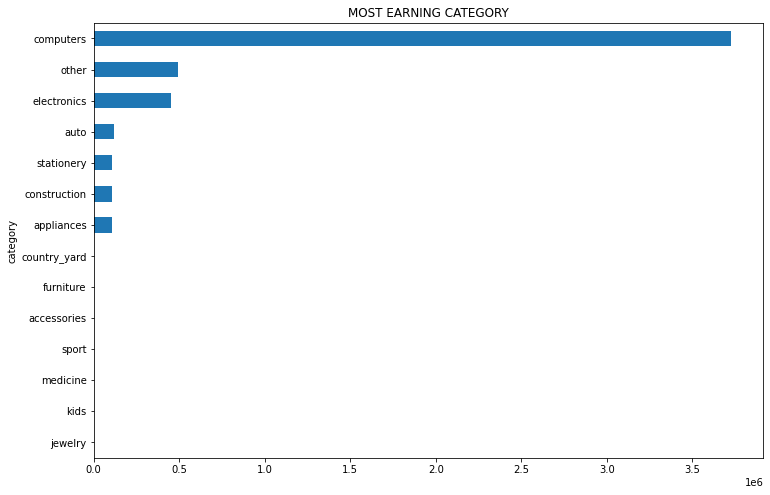

In [1082]:
plt.figure(figsize=(12,8))
purchase.groupby(['category'])['price'].sum().sort_values(ascending=True).plot(kind = 'barh',title = 'MOST EARNING CATEGORY');

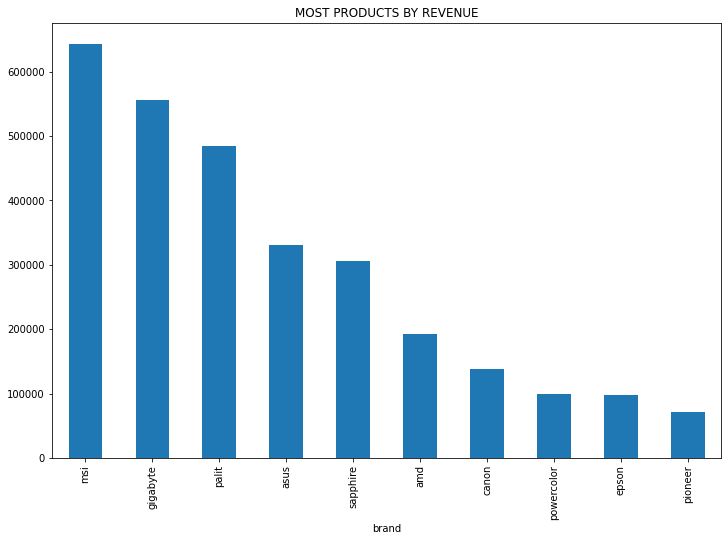

In [1083]:
plt.figure(figsize=(12,8))
purchase.groupby(['brand'])['price'].sum().sort_values(ascending=False)[:10].plot(kind = 'bar',title='MOST PRODUCTS BY REVENUE');

In [1084]:
print('total revenue from purchased products :',purchase.price.sum())

total revenue from purchased products : 5125395.62


Computers Category give the most revenue for e-commerce and the product give the most revenue is MSI. Such as data about products that are purchase. e-commerce must maintaince that category dan product for get a stable revenue.

In [1085]:
#save the new data
df_save = df.drop(['category_code'],axis=1)
df_save = df_save.dropna()

In [1086]:
df_save.event_type.nunique()

3

In [1087]:
df_save.to_csv('visualization_data.xlsx', index = None, header=True)

# DATA PROCESSING

As i can want to know they will purchase or not after they put it in the cart. I must to get the data about the items that have been placed in the cart, after that I will create a target column whose contents are 1 = purchase , 0 = not purchase.

In [1088]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,electronics
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,computers
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,other,NaN,9.81,1515915625513238515,4TMArHtXQy,other
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,computers
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,other,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,other


In [1089]:
#choose data who is in cart and drop duplicate
df_targets = df.loc[df['event_type'].isin(["view","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price','user_id','user_session'])

#purchased or not
df_targets['is_purchased'] = np.where(df_targets['event_type'] == 'purchase',1,0)

#max session/ last action of user
df_targets['is_purchased'] = df_targets.groupby(['user_session','product_id'])['is_purchased'].transform('max')

#select data who is in cart
df_targets = df_targets.loc[df_targets['event_type']=='view'].drop_duplicates(['user_session','product_id','is_purchased'])

#hour
df_targets['hour'] =df_targets['event_time'].dt.hour


In [1090]:
#look of our new data structure
df_targets

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category,is_purchased,hour
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,electronics,0.0,11
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,computers,0.0,11
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,other,NaN,9.81,1515915625513238515,4TMArHtXQy,other,0.0,11
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,computers,0.0,11
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,other,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,other,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
885123,2021-02-28 23:54:18+00:00,view,3829355,2144415922528452715,electronics.telephone,NaN,32.22,1515915625611023671,wZb7gP1zgN,electronics,0.0,23
885124,2021-02-28 23:55:01+00:00,view,953226,2144415927553229037,other,NaN,219.94,1515915625611023730,FRLqIttxKU,other,0.0,23
885125,2021-02-28 23:58:05+00:00,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma,electronics,0.0,23
885126,2021-02-28 23:58:09+00:00,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd,electronics,0.0,23


In [1091]:
df_targets.is_purchased.value_counts()

0.0    606579
1.0     24634
Name: is_purchased, dtype: int64

In [1092]:
df_targets.isnull().sum()


event_time            0
event_type            0
product_id            0
category_id           0
category_code         0
brand            154526
price                 0
user_id               0
user_session        137
category              0
is_purchased        137
hour                  0
dtype: int64

In [1093]:
df_targets.dropna(inplace=True)

In [1094]:
df_targets.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
category         0
is_purchased     0
hour             0
dtype: int64

In [1095]:
df_targets.is_purchased.value_counts()

0.0    458318
1.0     18399
Name: is_purchased, dtype: int64

In [1096]:
df_targets

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category,is_purchased,hour
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,computers,0.0,11
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,computers,0.0,11
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,other,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,other,0.0,11
5,2020-09-24 11:57:59+00:00,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW,construction,0.0,11
7,2020-09-24 11:58:24+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw,computers,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
885116,2021-02-28 23:47:49+00:00,view,1271549,2144415924424278172,electronics.audio.acoustic,edifier,405.65,1515915625611022987,7geq5gYdXF,electronics,0.0,23
885118,2021-02-28 23:51:06+00:00,view,3759378,2144415927972659448,computers.notebook,dockcase,50.16,1515915625611023376,GheawAs525,computers,0.0,23
885122,2021-02-28 23:53:13+00:00,view,4079420,2144415922427789416,computers.components.videocards,msi,449.51,1515915625611023581,zrl0oKrysT,computers,0.0,23
885125,2021-02-28 23:58:05+00:00,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma,electronics,0.0,23


In [1097]:
#take data inference
data_inf = df_targets.sample(10,random_state=1)
data_inf

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category,is_purchased,hour
181075,2020-10-30 11:42:59+00:00,view,3828691,2144415922201296994,other,smartbuy,9.94,1515915625525647499,91W2enjqKU,other,0.0,11
173580,2020-10-29 08:42:41+00:00,view,885866,2144415924751433893,computers.notebook,topon,36.35,1515915625531822714,huXQKCPjOK,computers,0.0,8
228266,2020-11-07 03:28:58+00:00,view,212225,2144415926966026460,computers.components.cpu,amd,60.35,1515915625536385087,OrOhcum5vZ,computers,0.0,3
677256,2021-01-25 10:42:22+00:00,view,4183866,2144415922427789416,computers.components.videocards,gigabyte,367.46,1515915625596933579,gYJNYjwEJc,computers,0.0,10
806406,2021-02-15 05:53:24+00:00,view,4163312,2144415925196030129,electronics.telephone,strike,32.81,1515915625605629547,x3nF7eQZxj,electronics,0.0,5
21440,2020-09-29 13:41:15+00:00,view,3760001,2144415923107266682,computers.peripherals.printer,canon,314.68,1515915625485419353,HVJEpeKHO3,computers,0.0,13
689683,2021-01-27 07:42:08+00:00,view,4170530,2144415927645503728,other,orient,47.41,1515915625597576765,bGxt5oQFZt,other,0.0,7
724307,2021-02-01 21:29:07+00:00,view,4047245,2144415923107266682,computers.peripherals.printer,epson,381.62,1515915625599584117,CpxqKneKQy,computers,0.0,21
213128,2020-11-04 16:20:50+00:00,view,828962,2144415935841173967,electronics.telephone,sirius,10.14,1515915625527380775,ddE7TteqYZ,electronics,0.0,16
361528,2020-11-27 14:38:58+00:00,view,1667080,2144415939305669165,other,orient,18.78,1515915625545457517,ro47aYW0FC,other,0.0,14


In [1101]:
df_targets.drop(data_inf.index,inplace=True)

In [1103]:
#resampling not_purchase data
not_purchase = df_targets.query("is_purchased == 0")
purchase = df_targets.query("is_purchased == 1")

n = 20000
not_purchase = not_purchase.sample(n, random_state=1)

#concat dataset
df_targets = pd.concat([not_purchase,purchase])

In [1104]:
#select feature not contain unique values and time

df_targets = df_targets[['brand','price','category','is_purchased','hour']]
df_targets.reset_index(inplace=True, drop=True)

In [1105]:
df_targets

,brand,price,category,is_purchased,hour
0,jxd,95.87,other,0.0,9
1,janome,236.08,appliances,0.0,13
2,kada,65.08,construction,0.0,6
3,ark,61.16,electronics,0.0,18
4,asus,58.63,computers,0.0,17
...,...,...,...,...,...
38394,msi,294.41,computers,1.0,21
38395,steelseries,201.33,electronics,1.0,22
38396,pantum,67.00,computers,1.0,23
38397,msi,656.63,computers,1.0,23


## Splitting data

In [1106]:
X = df_targets.drop(['is_purchased'],axis= 1)
y = df_targets['is_purchased']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20 , random_state = 16)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (30719, 4)
Shape of X_test: (7680, 4)
Shape of y_train: (30719,)
Shape of y_test: (7680,)


## Future Selection

In this section, several feature selection methods will be carried out.
-   pearson correlation heat map 
-   feature importance
-   select k-best

### Pearson Correlation Heatmap

In [1107]:
num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

X_train_num =X_train[num_columns].copy()
y_train_num =y_train.copy()

X_train_num.reset_index(drop=True,inplace=True)
y_train_num.reset_index(drop=True,inplace=True)

train_set = pd.concat([X_train_num,y_train_num],axis=1)

train_set

,price,hour,is_purchased
0,14.19,22,0.0
1,29.52,21,1.0
2,15.17,10,0.0
3,23.51,5,1.0
4,161.30,7,0.0
...,...,...,...
30714,80.03,18,0.0
30715,54.52,3,1.0
30716,54.89,18,1.0
30717,268.17,12,1.0


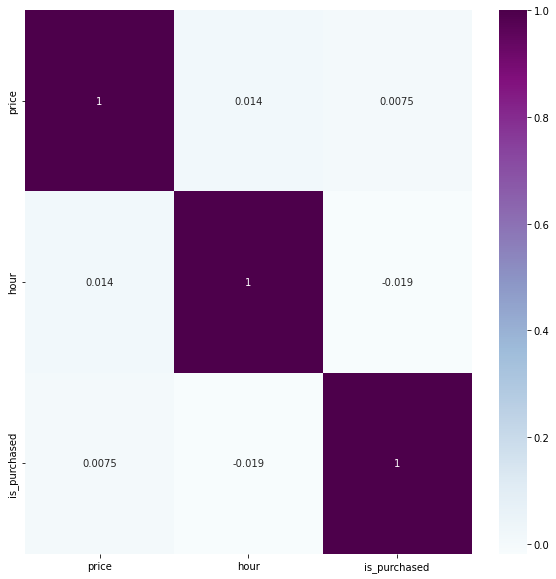

In [1108]:
corr_num = train_set.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_num,cmap="BuPu",annot=True);
plt.show()

not feature have a 1 point compared to is_purchased, so all feature will used for this model.

### Feature importance

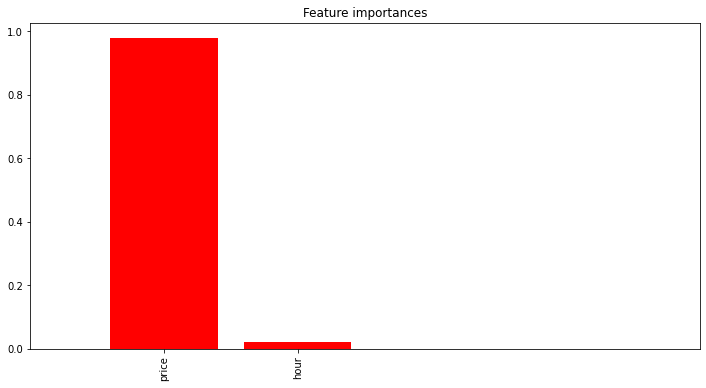

In [1109]:
from sklearn.ensemble import ExtraTreesClassifier

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
X_train_num = X_train[num_columns].copy()

# feature extraction
model = ExtraTreesClassifier(n_estimators=400)
model.fit(X_train_num, y_train)

# feature_importances_ dari highest ke lowest
sorted_idx = np.argsort(model.feature_importances_)
sorted_idx = sorted_idx[::-1]

# plot feature importances
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train_num.shape[1]), model.feature_importances_[sorted_idx],
        color="r", align="center")
plt.xticks(range(X_train_num.shape[1]), X_train_num.columns[sorted_idx], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

But using feature importance we know price is have a high point of importance to predict customer will purchare or not purchase.

Feature brand : 325.82 
Feature category : 300.56 



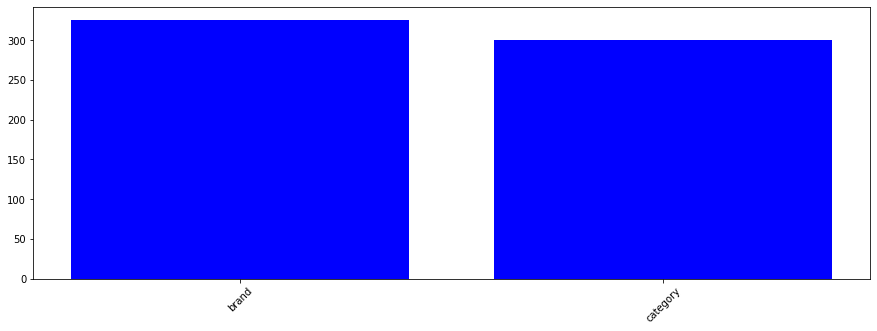

In [1110]:
feat_encoded = LabelEncoder() #categorical encoder
train_cat = X_train.select_dtypes(include="object")
feat_cat= train_cat.apply(feat_encoded.fit_transform)

fs_cat = SelectKBest(score_func=chi2, k='all')

X_features_cat = fs_cat.fit_transform(feat_cat, y_train)

for col in list(feat_cat.columns):
  score = fs_cat.scores_[feat_cat.columns.get_loc(col)]
  print("Feature %s : %.2f " %(col , score))
print("")

plt.figure(figsize=(15,5));
plt.bar([col for col in list(feat_cat.columns)], fs_cat.scores_ , color="blue");
plt.xticks(rotation=45);

in categorical columns we know brand is the most importance feature for customer choose purchase or not. so we will used the brand feature. category have a low importance for predict, but we still used it. that will help us to predict the customer descision. 

## Handling Outliers

In [1111]:
distribution = pd.DataFrame(X_train.skew(axis=0), columns = ['skew']).reset_index()
distribution['dist'] = np.where((distribution['skew'] < 0.5) & (distribution['skew'] > -0.5), 'normal', 'skew')
distribution.rename(columns={'index':'columns'},inplace=True)


distribution

,columns,skew,dist
0,price,36.15549,skew
1,hour,-0.09842,normal


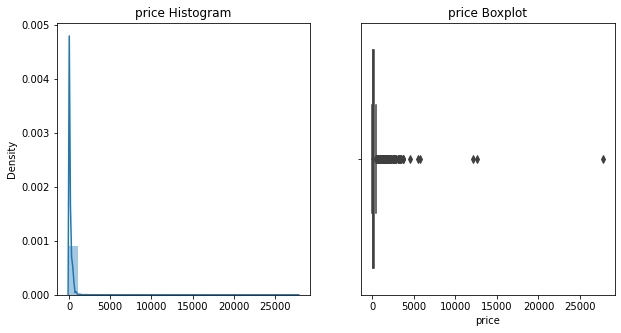

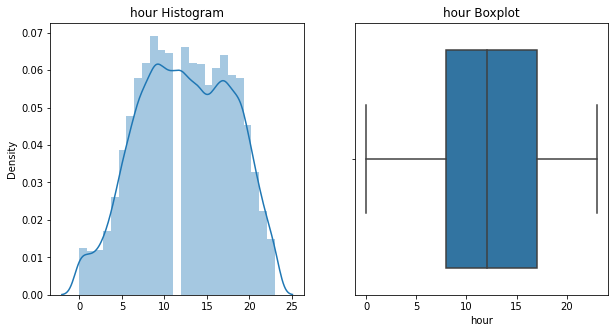

In [1112]:
for row in distribution.index.tolist():
    col= distribution.iloc[row]['columns']

    fig,ax = plt.subplots(1,2, figsize=(10,5))

    sns.distplot(x=X_train[col],bins=25, ax=ax[0])
    sns.boxplot(x=X_train[col], ax=ax[1])

    ax[0].set_title(col + ' ' + 'Histogram')
    ax[1].set_title(col + ' ' + 'Boxplot')

plt.show()

Price have a skew/not normal distribution and hour is normal distribution. Box plot that is let we know there is a outliers or no. we can see the difference between hour boxplot and price boxplot, in price boxplot there is so many black dots outside the box and in hour there is not black dot outside the box. That tell us price is have a outliers. 

### Check Outlier

In [1113]:
#make a function for skew distribution
def skew_boundaries(df, variable, distance):
    iqr = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lb = df[variable].quantile(0.25) - (iqr * distance)
    ub = df[variable].quantile(0.75) + (iqr * distance)

    return ub,lb

#make a function for normal distribution
def normal_boundaries(df, variable, distance):
    ub = df[variable].mean() + distance * df[variable].std()
    lb = df[variable].mean() - distance * df[variable].std()

    return ub,lb

#dataset numerical,we cant know the distribution of categorical columns

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
train_num = X_train[num_columns].copy()

#make a list
outliers = {
    'columns': [],
    'upper_boundary': [],
    'lower_boundary': [],
    'total_outliers': [],
    'bigger_than_ub_percent': [],
    'lower_than_lb_percent': [],
    'total_percent': []}

#do a looping
for i in distribution.index.tolist():
    col=distribution.iloc[i]['columns']
    dist = distribution.iloc[i]['dist']
    
    if dist == 'skew':
        ub,lb = skew_boundaries(X_train,col,1.5)
    else:
        ub,lb = normal_boundaries(X_train,col,3)

    total = len(train_num[train_num[col] > ub]) + len(train_num[train_num[col] < lb])
    ubpercent = len(train_num[train_num[col] > ub])/len(train_num) * 100
    lbpercent = len(train_num[train_num[col] < lb])/len(train_num) * 100
    totalpercent = ubpercent + lbpercent

    #insert  the result to the list
    outliers['columns'].append(col)
    outliers['upper_boundary'].append(ub)
    outliers['lower_boundary'].append(lb)
    outliers['total_outliers'].append(total)
    outliers['bigger_than_ub_percent'].append(ubpercent)
    outliers['lower_than_lb_percent'].append(lbpercent)
    outliers['total_percent'].append(totalpercent)

#mmake a dataframe from the list
outliers = pd.DataFrame(outliers)
outliers = pd.merge(outliers,distribution)
outliers

,columns,upper_boundary,lower_boundary,total_outliers,bigger_than_ub_percent,lower_than_lb_percent,total_percent,skew,dist
0,price,483.590000,-235.050000,2140,6.966373,0.0,6.966373,36.15549,skew
1,hour,28.756594,-3.907673,0,0.000000,0.0,0.000000,-0.09842,normal


We have 17% of outlier in column price, with that point i will leave the outlier there. Sometime outliers can make a good accuracy for model.

In [1114]:
#capping outliers with winsorizer

print('X train shape before capping:', X_train.shape)  

capping = Winsorizer(capping_method = 'iqr',
                        tail='both',
                        fold=1.5,
                        variables = 'price',
                        missing_values= 'ignore')
                        
capping.fit(X_train)
X_train = capping.transform(X_train)

print('X train shape after capping:', X_train.shape)  

X train shape before capping: (30719, 4)
X train shape after capping: (30719, 4)


## Check Missing Value

In [1115]:
X_train.isnull().sum()

brand       0
price       0
category    0
hour        0
dtype: int64

In [1116]:
X_test.isnull().sum()

brand       0
price       0
category    0
hour        0
dtype: int64

In [1117]:
y_train.isnull().sum()

0

In [1118]:
y_test.isnull().sum()

0

# MODE DEFINITION

## Pipeline

In [1120]:
#seperate numerical and categorical columns
num_columns = X_train.select_dtypes(include=np.number).columns
cat_columns = X_train.select_dtypes(exclude=np.number).columns

#pipeline

num_pipe = Pipeline([
    ('scaling', MinMaxScaler())
])

cat_pipe =  Pipeline([
    ('encoded',OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num',num_pipe,num_columns),
    ('cat',cat_pipe,cat_columns)
])

In [1121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [1122]:
pipe_tree = Pipeline([
('preprocessing', preprocess ),
('classifier', DecisionTreeClassifier(random_state=16))
])

pipe_rf = Pipeline([
('preprocessing', preprocess ),
('classifier', RandomForestClassifier())
])

pipe_xgb = Pipeline([
    ('preprocessing', preprocess),
    ('classifier', XGBClassifier())
    ])

# MODEL TRAINING

In [1123]:
tree = pipe_tree.fit(X_train,y_train)
rf = pipe_rf.fit(X_train,y_train)

In [1124]:
xgb = pipe_xgb.fit(X_train,y_train)

[13:34:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# MODEL EVALUATION

### Descision Tree

In [1126]:
y_pred_train_tree = tree.predict(X_train)
y_pred_test_tree = tree.predict(X_test)

print(classification_report(y_train, y_pred_train_tree))

print(classification_report(y_test, y_pred_test_tree))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90     16026
         1.0       0.89      0.88      0.88     14693

    accuracy                           0.89     30719
   macro avg       0.89      0.89      0.89     30719
weighted avg       0.89      0.89      0.89     30719

              precision    recall  f1-score   support

         0.0       0.64      0.63      0.64      3974
         1.0       0.61      0.62      0.61      3706

    accuracy                           0.63      7680
   macro avg       0.62      0.62      0.62      7680
weighted avg       0.63      0.63      0.63      7680



### Random Forest

In [1127]:
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

print(classification_report(y_train, y_pred_train_rf))

print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89     16026
         1.0       0.86      0.92      0.89     14693

    accuracy                           0.89     30719
   macro avg       0.89      0.89      0.89     30719
weighted avg       0.89      0.89      0.89     30719

              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65      3974
         1.0       0.63      0.65      0.64      3706

    accuracy                           0.65      7680
   macro avg       0.65      0.65      0.65      7680
weighted avg       0.65      0.65      0.65      7680



### XGBoost

In [1128]:
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

print(classification_report(y_train, y_pred_train_xgb))

print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71     16026
         1.0       0.68      0.66      0.67     14693

    accuracy                           0.69     30719
   macro avg       0.69      0.69      0.69     30719
weighted avg       0.69      0.69      0.69     30719

              precision    recall  f1-score   support

         0.0       0.66      0.69      0.68      3974
         1.0       0.65      0.62      0.64      3706

    accuracy                           0.66      7680
   macro avg       0.66      0.66      0.66      7680
weighted avg       0.66      0.66      0.66      7680



Before use Hyperparameter we can see Random Forest model have a highest train accurary with 83% but XGBoost have a highest accuracy for testing. That we know the data is overfitting because accuracy of trainset is much better then test set. We need improve this model with hyper parameter.

### HyperParameter

In [1161]:
#create hyperparameter for each model

param_tree = {'classifier__criterion':['gini','entropy'],
              'classifier__max_depth':np.arange(2,6),
              'classifier__min_samples_split':np.arange(2,6),
              'classifier__min_samples_leaf':np.arange(2,6),
              'classifier__max_features':['auto','sqrt','log2']
              }

param_rf = {'classifier__criterion': ['gini','entropy'],
                  'classifier__max_depth':np.arange(2,6),
                  'classifier__max_features':['auto','sqrt','log2'],
                  'classifier__n_estimators' : [100,120,130] 
                   }

param_XGB = {'classifier__booster': ['gbtree','gblinear'],
                  'classifier__max_depth':np.arange(2,6),
                  'classifier__min_child_weight' : np.arange(0,2),
                  'classifier__learning_rate' : np.arange(0.3,1)
                   }

### GridSearchCV

GridSearchCV is a library that is used to find the best parameters that we have set up in the model. This can shorten the time it takes to find the best parameters instead of having to look for one by one.

In [1162]:
from sklearn.model_selection import GridSearchCV

In [1163]:
grid_tree = GridSearchCV(pipe_tree,param_tree,cv = 5).fit(X_train,y_train)
grid_rf = GridSearchCV(pipe_rf,param_rf,cv = 5).fit(X_train,y_train)
grid_xgb = GridSearchCV(pipe_xgb,param_XGB,cv = 5).fit(X_train,y_train)

[14:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Model Evaluataion With HyperParameters

In [1164]:
comparison_tuned = pd.DataFrame(columns=[
    'Model',
    'f1_score_train',
    'f1_score_test',
    'precision_train',
    'precision_test'
])

## DT with Best Parameter

In [1165]:
grid_tree.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 5,
 'classifier__max_features': 'auto',
 'classifier__min_samples_leaf': 3,
 'classifier__min_samples_split': 2}

In [1166]:
tree_best = grid_tree.best_estimator_

y_pred_train_tree = tree_best.predict(X_train)
y_pred_test_tree = tree_best.predict(X_test)

print(classification_report(y_train, y_pred_train_tree))

print(classification_report(y_test, y_pred_test_tree))

              precision    recall  f1-score   support

         0.0       0.60      0.64      0.62     16026
         1.0       0.58      0.54      0.56     14693

    accuracy                           0.59     30719
   macro avg       0.59      0.59      0.59     30719
weighted avg       0.59      0.59      0.59     30719

              precision    recall  f1-score   support

         0.0       0.60      0.64      0.62      3974
         1.0       0.59      0.55      0.57      3706

    accuracy                           0.60      7680
   macro avg       0.60      0.59      0.59      7680
weighted avg       0.60      0.60      0.60      7680



In [1177]:
comparison_tuned.loc[0] = ['tree_tuned',0.59,0.60,0.59,0.60]

## RF with best parameters

In [1168]:
grid_rf.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 5,
 'classifier__max_features': 'sqrt',
 'classifier__n_estimators': 120}

In [1169]:
rf_best = grid_rf.best_estimator_


y_pred_train_rf = rf_best.predict(X_train)
y_pred_test_rf = rf_best.predict(X_test)

print(classification_report(y_train, y_pred_train_rf))

print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.59      0.82      0.68     16026
         1.0       0.65      0.37      0.47     14693

    accuracy                           0.60     30719
   macro avg       0.62      0.59      0.58     30719
weighted avg       0.62      0.60      0.58     30719

              precision    recall  f1-score   support

         0.0       0.58      0.81      0.68      3974
         1.0       0.65      0.38      0.48      3706

    accuracy                           0.60      7680
   macro avg       0.62      0.60      0.58      7680
weighted avg       0.62      0.60      0.58      7680



In [1178]:
comparison_tuned.loc[1] = ['rf_tuned',0.60,0.60,0.62,0.62]

## XBG with best parameters

In [1171]:
grid_xgb.best_params_

{'classifier__booster': 'gbtree',
 'classifier__learning_rate': 0.3,
 'classifier__max_depth': 5,
 'classifier__min_child_weight': 1}

In [1172]:
xgb_best = grid_xgb.best_estimator_


y_pred_train_xgb = xgb_best.predict(X_train)
y_pred_test_xgb = xgb_best.predict(X_test)

print(classification_report(y_train, y_pred_train_xgb))

print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70     16026
         1.0       0.67      0.64      0.66     14693

    accuracy                           0.68     30719
   macro avg       0.68      0.68      0.68     30719
weighted avg       0.68      0.68      0.68     30719

              precision    recall  f1-score   support

         0.0       0.66      0.70      0.68      3974
         1.0       0.66      0.62      0.64      3706

    accuracy                           0.66      7680
   macro avg       0.66      0.66      0.66      7680
weighted avg       0.66      0.66      0.66      7680



In [1179]:
comparison_tuned.loc[2] = ['xgb_tuned',0.68,0.66,0.68,0.66]

## Model Comparison With HyperTuning

In [1174]:
cf_matrix_tree =  confusion_matrix(y_test,y_pred_test_tree)
cf_matrix_rf =  confusion_matrix(y_test,y_pred_test_rf)
cf_matrix_xgb =  confusion_matrix(y_test,y_pred_test_xgb)

#make a list of confusion matrix
cf = [cf_matrix_tree,
        cf_matrix_rf,
        cf_matrix_xgb]


comparison_tuned.reset_index(drop=True,inplace=True)

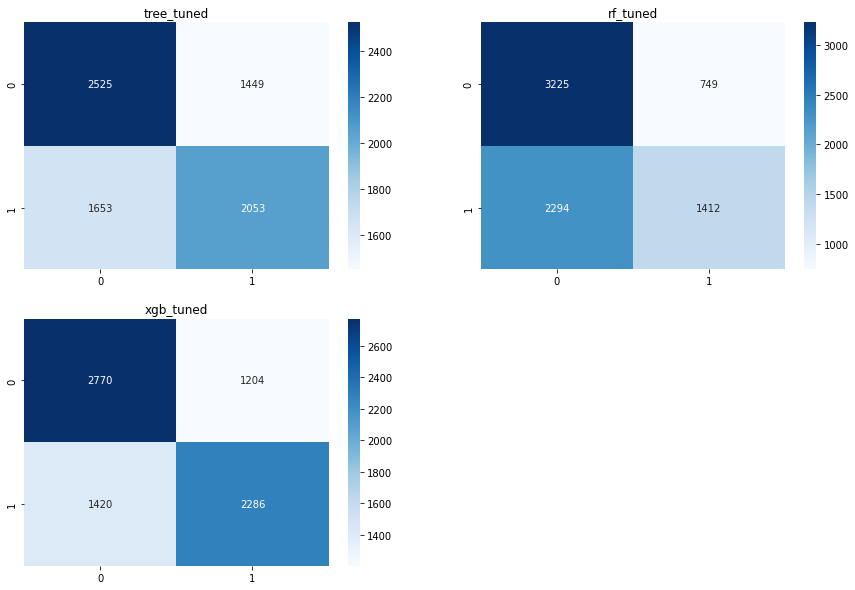

In [1175]:
#looping for confusion matrix heatmap
plt.figure(figsize=(15, 10))
for i in range(len(comparison_tuned.Model)):
  plt.subplot(2, 2, i+1)
  ax = sns.heatmap(cf[i], annot=True, cmap='Blues', fmt='g')
  ax.set_xticklabels(['0', '1'])
  ax.set_yticklabels(['0', '1'])
  plt.title(comparison_tuned.iloc[i, 0])
plt.show()

In [1180]:
comparison_tuned

,Model,f1_score_train,f1_score_test,precision_train,precision_test
0,tree_tuned,0.59,0.60,0.59,0.60
1,rf_tuned,0.60,0.60,0.62,0.62
2,xgb_tuned,0.68,0.66,0.68,0.66


From if we look to comparison_tuned table, we can she how XGBoost do a booster for another model. XGB boost have much better value from any point. So we can say XGB is more better model for this project, not the best, for me in this project the model can more improve than this but it will took time. So for this project i will use XGBoost model.

Precision is importance for avoid a false positive, model prediction say will purchase but acctually they not purchase. i want to fokus in customer who will purchase, so i must avoid a false negative. XGBoost have a highest prescision with 68% in train and 66% in test.

### Save pkl file.

In [1181]:
#save file pipeline
with open("pipe.pkl", "wb") as a:
    pickle.dump(xgb_best, a)

## MODEL INFERENCE

In [1182]:
column = X_train.columns

df_inf = data_inf[column]

df_inf.reset_index(drop=True,inplace=True)

df_inf

,brand,price,category,hour
0,smartbuy,9.94,other,11
1,topon,36.35,computers,8
2,amd,60.35,computers,3
3,gigabyte,367.46,computers,10
4,strike,32.81,electronics,5
5,canon,314.68,computers,13
6,orient,47.41,other,7
7,epson,381.62,computers,21
8,sirius,10.14,electronics,16
9,orient,18.78,other,14


we have 10 data inf can used for testing the model.

In [1183]:
#load file pkl

with open("pipe.pkl", "rb") as a:
    pipeline = pickle.load(a)

In [1184]:
#prediction with the best model that i have

y_pred_inf = pipeline.predict(df_inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['purchase prediction'])
y_pred_inf

,purchase prediction
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
5,1.0
6,0.0
7,1.0
8,0.0
9,0.0


In [1185]:
#combine the dataset
data_final = pd.concat([df_inf, y_pred_inf], axis=1)

#result
data_final

,brand,price,category,hour,purchase prediction
0,smartbuy,9.94,other,11,0.0
1,topon,36.35,computers,8,1.0
2,amd,60.35,computers,3,0.0
3,gigabyte,367.46,computers,10,1.0
4,strike,32.81,electronics,5,0.0
5,canon,314.68,computers,13,1.0
6,orient,47.41,other,7,0.0
7,epson,381.62,computers,21,1.0
8,sirius,10.14,electronics,16,0.0
9,orient,18.78,other,14,0.0


# CONCLUTIONS

From this project we can know, that the most action of customer in e-commerce web is a view and we can say, customer took a long time to take a look a product before they going to purchase it. After looking around, few customers put their goods into the cart.

MSI is the most product that customer choose to purchase. Computers is the most category that have a traffic compared to another category. I can say, this e-commerce have a good traffic in computer so they must maintance computer category so it can attract more customer attention.

From Modeling, after used 3 model for predicting customer will purchase or not after they put it in cart. XGBoost have a better performance from another model. But the model can still be developed again in order to give better results. Dont worry, we can do it in another time, so we can make a good model for this project.